In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns
import os 

In [67]:
datafile = os.path.join(os.path.dirname(os.getcwd()),'Data')
dataNotLabelled = pd.read_csv(datafile+'/large.csv')
jeopardy = pd.read_csv(datafile+'/jeopardy.csv')

In [68]:
jeopardy[jeopardy.suspicious == 1].count()

cif           17141
suspicious    17141
dtype: int64

In [69]:
data = pd.merge(dataNotLabelled,jeopardy, how='left',on = 'cif')

In [70]:
data.describe()

,cif,category,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit,suspicious
count,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,9.050000e+07,0.400530,2.937814e+07,28.136660,0.331490,31.726469,91.863301,0.006851,44.768997,114.264231,1.996756,6.246905,0.255042,3.212197e+06,1.078914e+05,0.017141
std,2.886753e+05,0.663837,4.650136e+08,55.464787,0.308724,25.749573,43.678328,0.082487,52.223190,77.830115,0.999137,16.322718,0.174461,1.820511e+08,3.420959e+06,0.129797
min,9.000000e+07,0.000000,0.000000e+00,0.000000,0.000000,0.000000,24.000000,0.000000,0.120000,1.000000,1.000000,0.000000,0.000026,0.000000e+00,0.000000e+00,0.000000
25%,9.025000e+07,0.000000,9.053680e+04,1.000000,0.000000,0.000000,82.000000,0.000000,5.680000,72.000000,1.000000,1.000000,0.122934,1.592175e+02,2.249756e+01,0.000000
50%,9.050000e+07,0.000000,4.316990e+05,3.000000,0.309917,32.000000,90.000000,0.000000,28.220000,95.000000,2.000000,1.000000,0.217838,4.934665e+03,4.699416e+02,0.000000
75%,9.075000e+07,1.000000,1.529052e+06,30.000000,0.500000,54.000000,123.000000,0.000000,63.520000,131.000000,3.000000,4.000000,0.348258,4.920691e+04,3.577423e+03,0.000000
max,9.100000e+07,2.000000,1.308870e+11,1472.000000,1.000000,126.000000,187.000000,1.000000,1281.110000,1295.000000,10.000000,700.000000,0.998780,1.186690e+11,2.155327e+09,1.000000


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 17 columns):
cif                        1000000 non-null int64
category                   1000000 non-null int64
turnover                   1000000 non-null float64
transaction_count          1000000 non-null int64
io_ratio                   1000000 non-null float64
age                        1000000 non-null int64
nationality                1000000 non-null int64
is_pep                     1000000 non-null int64
inactive_days_average      1000000 non-null float64
inactive_days_max          1000000 non-null int64
n_of_accounts              1000000 non-null int64
distinct_counterparties    1000000 non-null int64
channel_risk               1000000 non-null float64
atm_withdrawal             1000000 non-null float64
atm_deposit                1000000 non-null float64
suspicious                 1000000 non-null int64
io_atm_ratio               1000000 non-null float64
dtypes: float64(7), int6

In [72]:
#Percentage of customer being suspicious
CustomersByCategory = data[['cif','category']].groupby('category').count()
SuspiciousByCategory = data[data.suspicious == 1][['cif','category']].groupby('category').count()

ShareSuspiciousByCategory = SuspiciousByCategory/CustomersByCategory
ShareSuspiciousByCategory*100

,cif
category,
0,1.999123
1,1.041729
2,1.065941


In [95]:
#Percentage of customer being suspicious
CustomersByNationality = data[['cif','nationality']].groupby('nationality').count()
SuspiciousByNationality = data[data.suspicious == 1][['cif','nationality']].groupby('nationality').count()

ShareSuspiciousByNationality = SuspiciousByNationality/CustomersByNationality
pd.concat(objs = [ShareSuspiciousByNationality*100,CustomersByNationality], axis = 1)

,cif,cif
nationality,,
24,100.000000,1
32,1.355795,225624
33,5.657246,19886
47,66.666667,3
82,1.076214,228672
90,0.961109,154405
113,47.368421,19
123,1.786116,164491
125,2.517581,96839


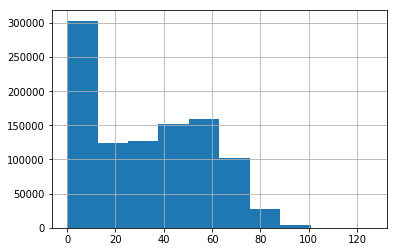

In [73]:
data.age.hist()

In [74]:
data['io_atm_ratio'] = data['atm_deposit']/data['atm_withdrawal']
df0 = data[data['category']==0]
df1 = data[data['category']==1]
df2 = data[data['category']==2]

In [75]:
data.loc[data['atm_withdrawal'] == 0,'io_atm_ratio'] = 1e12

In [76]:
data.head()

,cif,category,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit,suspicious,io_atm_ratio
0,90000000,0,217673.05,125,0.304000,40,123,0,1.66,88,1,3,0.254742,1937.15,2161.790028,0,1.115964e+00
1,90000001,0,57.42,20,0.250000,17,90,0,7.32,88,4,6,0.393174,4.96,0.893866,0,1.802149e-01
2,90000002,0,1465076.90,1,0.000000,66,123,0,24.08,25,2,1,0.422991,0.00,229.333494,0,1.000000e+12
3,90000003,0,429840.54,46,0.239130,43,90,0,3.88,86,2,17,0.296019,43123.33,3121.939606,0,7.239561e-02
4,90000004,2,93356190.65,63,0.365079,0,186,0,2.77,100,1,1,0.067511,1814340.25,603026.545700,0,3.323668e-01


In [77]:
data.describe()

,cif,category,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit,suspicious,io_atm_ratio
count,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06
mean,9.050000e+07,0.400530,2.937814e+07,28.136660,0.331490,31.726469,91.863301,0.006851,44.768997,114.264231,1.996756,6.246905,0.255042,3.212197e+06,1.078914e+05,0.017141,1.600621e+11
std,2.886753e+05,0.663837,4.650136e+08,55.464787,0.308724,25.749573,43.678328,0.082487,52.223190,77.830115,0.999137,16.322718,0.174461,1.820511e+08,3.420959e+06,0.129797,3.666637e+11
min,9.000000e+07,0.000000,0.000000e+00,0.000000,0.000000,0.000000,24.000000,0.000000,0.120000,1.000000,1.000000,0.000000,0.000026,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,9.025000e+07,0.000000,9.053680e+04,1.000000,0.000000,0.000000,82.000000,0.000000,5.680000,72.000000,1.000000,1.000000,0.122934,1.592175e+02,2.249756e+01,0.000000,2.913382e-03
50%,9.050000e+07,0.000000,4.316990e+05,3.000000,0.309917,32.000000,90.000000,0.000000,28.220000,95.000000,2.000000,1.000000,0.217838,4.934665e+03,4.699416e+02,0.000000,4.062977e-02
75%,9.075000e+07,1.000000,1.529052e+06,30.000000,0.500000,54.000000,123.000000,0.000000,63.520000,131.000000,3.000000,4.000000,0.348258,4.920691e+04,3.577423e+03,0.000000,2.126432e+00
max,9.100000e+07,2.000000,1.308870e+11,1472.000000,1.000000,126.000000,187.000000,1.000000,1281.110000,1295.000000,10.000000,700.000000,0.998780,1.186690e+11,2.155327e+09,1.000000,1.000000e+12


## Individual profile

In [ ]:
df0.drop(columns=['category'], inplace = True)
df1.drop(columns=['category','age','is_pep'], inplace = True)
df2.drop(columns=['category','age','is_pep'], inplace = True)

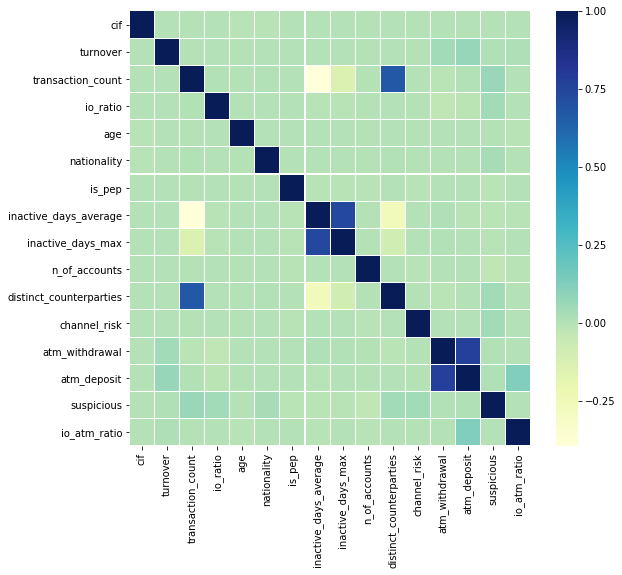

In [81]:
corrmat = df0.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ='YlGnBu', linewidths = 0.1)

## Company profile

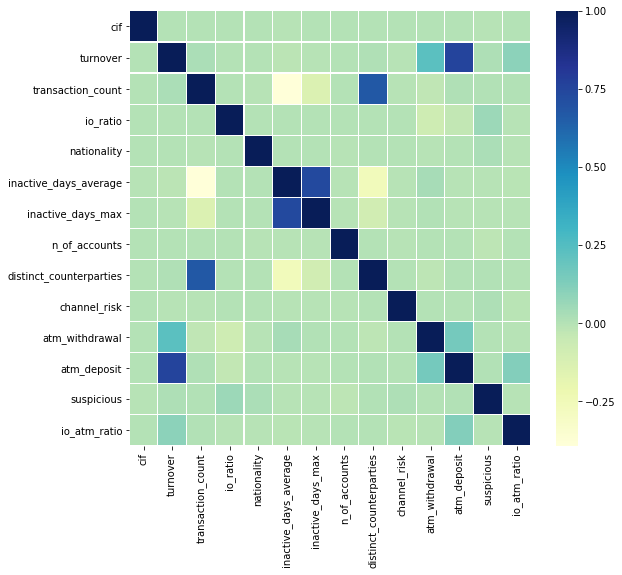

In [82]:
corrmat = df1.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ='YlGnBu', linewidths = 0.1)

## Other institution profile

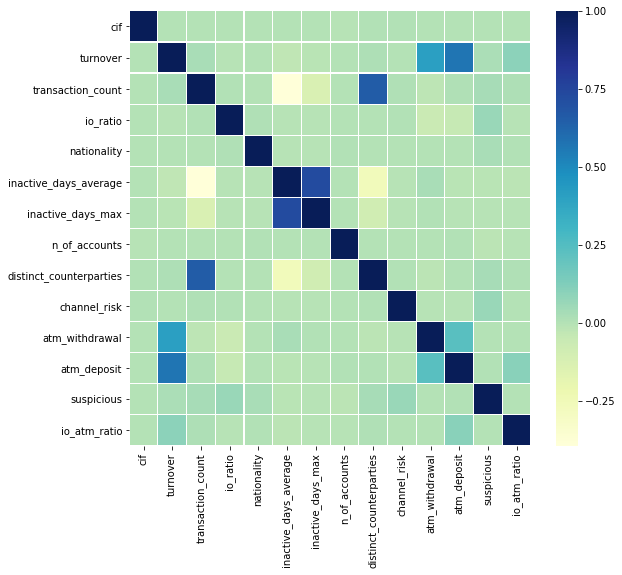

In [83]:
corrmat = df2.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ='YlGnBu', linewidths = 0.1)

In [86]:
df0.

,cif,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit,suspicious,io_atm_ratio
0,90000000,217673.05,125,0.30400,40,123,0,1.66,88,1,3,0.254742,1937.15,2161.790028,0,1.115964
1,90000001,57.42,20,0.25000,17,90,0,7.32,88,4,6,0.393174,4.96,0.893866,0,0.180215
2,90000002,1465076.90,1,0.00000,66,123,0,24.08,25,2,1,0.422991,0.00,229.333494,0,inf
3,90000003,429840.54,46,0.23913,43,90,0,3.88,86,2,17,0.296019,43123.33,3121.939606,0,0.072396
6,90000006,4167131.89,1,0.00000,24,90,0,95.21,191,4,1,0.381140,0.00,13631.843720,0,inf


In [30]:
df1.category.count()

194

In [31]:
df2.category.count()

121

cif                        1000
category                   1000
turnover                   1000
transaction_count          1000
io_ratio                   1000
age                        1000
nationality                1000
is_pep                     1000
inactive_days_average      1000
inactive_days_max          1000
n_of_accounts              1000
distinct_counterparties    1000
channel_risk               1000
atm_withdrawal             1000
atm_deposit                1000
dtype: int64

In [22]:
data[data['is_pep'] == 1].count()/data.count() *100

cif                        0.6851
category                   0.6851
turnover                   0.6851
transaction_count          0.6851
io_ratio                   0.6851
age                        0.6851
nationality                0.6851
is_pep                     0.6851
inactive_days_average      0.6851
inactive_days_max          0.6851
n_of_accounts              0.6851
distinct_counterparties    0.6851
channel_risk               0.6851
atm_withdrawal             0.6851
atm_deposit                0.6851
dtype: float64

In [35]:
data[(data['is_pep'] == 1) & (data['io_ratio'] > 0.5) & (data.distinct_counterparties > 5)]

,cif,category,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit
230100,90230100,0,38520.09,32,0.531250,40,90,1,6.88,138,1,9,0.234554,3178.00,0.016643
299056,90299056,0,149662.49,7,0.571429,20,166,1,34.04,137,1,7,0.340635,7640.69,156.083132
302472,90302472,0,182198.62,15,0.533333,86,166,1,9.35,85,2,6,0.176647,1683.75,23.514084
402944,90402944,0,410651.17,9,0.666667,61,125,1,16.76,68,3,9,0.183083,17632.56,24.275138
642625,90642625,0,40434.04,24,0.541667,67,125,1,4.56,69,1,8,0.232985,9009.77,181.293124
858753,90858753,0,387723.61,19,0.526316,40,125,1,8.55,120,2,8,0.153530,46563.00,23.450872
926840,90926840,0,4443.58,21,0.523810,70,33,1,6.68,81,2,8,0.460149,550.43,14.232806


In [50]:
data[(data['category'] == 0) & (data['is_pep'] == 0) & (data['io_ratio'] > 0.6) & (data['atm_withdrawal'] > data['atm_deposit'])]

,cif,category,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit
19,90000019,0,56020.68,1,1.000000,52,123,0,69.50,70,3,1,0.223771,422.36,0.000000
23,90000023,0,658330.33,1,1.000000,14,123,0,81.87,82,1,1,0.076115,20.26,0.000000
32,90000032,0,11016.13,1,1.000000,24,123,0,42.36,43,2,1,0.200365,2441.55,0.000000
40,90000040,0,409816.02,1,1.000000,48,32,0,30.01,61,2,1,0.331389,114558.64,0.000000
44,90000044,0,877439.13,8,0.625000,18,32,0,29.90,240,2,1,0.541417,5962.50,2459.159644
51,90000051,0,532462.34,1,1.000000,38,90,0,11.99,24,1,1,0.081074,6439.40,0.000000
59,90000059,0,217714.05,1,1.000000,56,123,0,45.03,46,2,1,0.335578,11735.96,0.000000
61,90000061,0,2910.09,3,0.666667,25,123,0,49.64,149,2,1,0.049496,287.21,7.446673
74,90000074,0,648377.40,1,1.000000,52,123,0,66.57,134,2,1,0.272124,66700.65,0.000000
76,90000076,0,2877182.81,1,1.000000,35,123,0,35.06,71,2,1,0.308999,0.03,0.000000


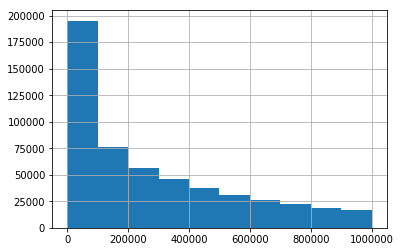

In [66]:
data[(data['is_pep'] == 0)  & (data.category == 0) & (data.turnover < 1000000)].turnover.hist()

## Searching for non Pep individuals having high turnover

In [27]:
CEO = data[(data['is_pep'] == 0)  & (data.category == 0) & (data.turnover > 1000000)]

In [29]:
CEO.describe()

,cif,category,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit,suspicious,io_atm_ratio
count,1.661430e+05,166143.0,1.661430e+05,166143.000000,166143.000000,166143.000000,166143.000000,166143.0,166143.000000,166143.000000,166143.000000,166143.000000,166143.000000,1.661430e+05,1.661430e+05,166143.000000,1.661430e+05
mean,9.050112e+07,0.0,5.369158e+06,33.398921,0.302909,45.388749,92.021656,0.0,41.789218,112.961864,1.991146,7.303973,0.231793,7.486803e+05,1.889824e+04,0.036673,1.557213e+11
std,2.882755e+05,0.0,3.288342e+08,63.782294,0.287514,18.079579,43.677766,0.0,49.853753,75.113726,0.996962,18.770375,0.142771,1.472785e+07,2.760740e+05,0.187959,3.625920e+11
min,9.000000e+07,0.0,1.000005e+06,1.000000,0.000000,6.000000,32.000000,0.0,0.120000,1.000000,1.000000,1.000000,0.000285,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,9.025228e+07,0.0,1.338017e+06,2.000000,0.000000,30.000000,82.000000,0.0,4.580000,73.000000,1.000000,1.000000,0.120531,3.770600e+02,7.052342e+02,0.000000,5.390101e-03
50%,9.050078e+07,0.0,1.925274e+06,4.000000,0.285714,46.000000,90.000000,0.0,26.030000,95.000000,2.000000,1.000000,0.207822,2.331044e+04,4.035607e+03,0.000000,1.026786e-01
75%,9.075107e+07,0.0,3.353091e+06,38.000000,0.400000,59.000000,123.000000,0.0,59.120000,128.000000,3.000000,4.000000,0.319730,1.960145e+05,1.327626e+04,0.000000,7.400574e+00
max,9.099998e+07,0.0,1.308870e+11,1472.000000,1.000000,126.000000,187.000000,0.0,608.830000,1215.000000,9.000000,522.000000,0.926810,4.166031e+09,8.583997e+07,1.000000,1.000000e+12


In [61]:
CEOsuspicious = CEO[CEO.suspicious == 1].cif.count()
CEOsuspicious

6093

In [56]:
CEOcount = CEO.cif.count()

CEOsuspicious/CEOcount

0.036673227280114115

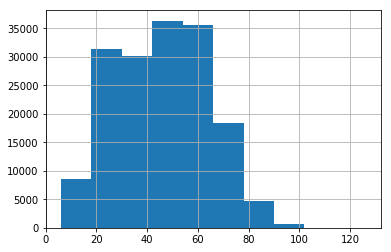

In [75]:
CEO.age.hist()

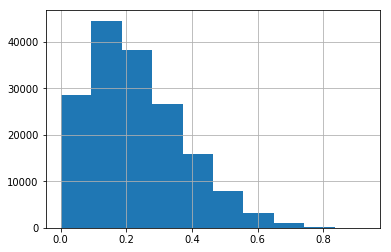

In [76]:
CEO.channel_risk.hist()

In [77]:
CEO[CEO.channel_risk > 0.5].count()

cif                        8564
category                   8564
turnover                   8564
transaction_count          8564
io_ratio                   8564
age                        8564
nationality                8564
is_pep                     8564
inactive_days_average      8564
inactive_days_max          8564
n_of_accounts              8564
distinct_counterparties    8564
channel_risk               8564
atm_withdrawal             8564
atm_deposit                8564
dtype: int64

In [62]:
CEOHighlySuspicious = CEO[(CEO.atm_withdrawal > CEO.atm_deposit) & (CEO.atm_withdrawal > 1000000) & (CEO.io_ratio > 0.5) & (CEO.transaction_count == 1) & (CEO.distinct_counterparties >=1)]
CEOHighlySuspicious.describe()

,cif,category,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit,suspicious,io_atm_ratio
count,1.490000e+02,149.0,1.490000e+02,149.0,149.0,149.000000,149.000000,149.0,149.000000,149.000000,149.000000,149.0,149.000000,1.490000e+02,149.0,149.000000,149.0
mean,9.049048e+07,0.0,2.766207e+07,1.0,1.0,47.382550,90.610738,0.0,89.192282,127.208054,1.986577,1.0,0.237241,2.267977e+06,0.0,0.208054,0.0
std,3.052793e+05,0.0,7.733160e+07,0.0,0.0,18.673799,48.703836,0.0,59.242795,92.923994,0.944304,0.0,0.147462,2.751004e+06,0.0,0.407284,0.0
min,9.000078e+07,0.0,2.894364e+06,1.0,1.0,14.000000,32.000000,0.0,11.700000,12.000000,1.000000,1.0,0.011694,1.001047e+06,0.0,0.000000,0.0
25%,9.023177e+07,0.0,6.817565e+06,1.0,1.0,33.000000,32.000000,0.0,49.190000,61.000000,1.000000,1.0,0.118953,1.183371e+06,0.0,0.000000,0.0
50%,9.045539e+07,0.0,1.153018e+07,1.0,1.0,49.000000,82.000000,0.0,72.550000,104.000000,2.000000,1.0,0.219706,1.542230e+06,0.0,0.000000,0.0
75%,9.075600e+07,0.0,2.443093e+07,1.0,1.0,61.000000,123.000000,0.0,113.450000,175.000000,3.000000,1.0,0.306350,2.519458e+06,0.0,0.000000,0.0
max,9.099722e+07,0.0,9.077120e+08,1.0,1.0,95.000000,187.000000,0.0,304.530000,557.000000,5.000000,1.0,0.687841,3.008418e+07,0.0,1.000000,0.0


In [58]:
CEOHighlySuspicious.cif.count()

149

In [63]:
CEOHighlySuspicious[CEOHighlySuspicious.suspicious == 1].cif.count()

31

In [60]:
CEOHighlySuspicious.cif.count()/CEOsuspicious

0.024454291810274083

In [96]:
data[data.distinct_counterparties > 1].count()

cif                        383869
category                   383869
turnover                   383869
transaction_count          383869
io_ratio                   383869
age                        383869
nationality                383869
is_pep                     383869
inactive_days_average      383869
inactive_days_max          383869
n_of_accounts              383869
distinct_counterparties    383869
channel_risk               383869
atm_withdrawal             383869
atm_deposit                383869
dtype: int64

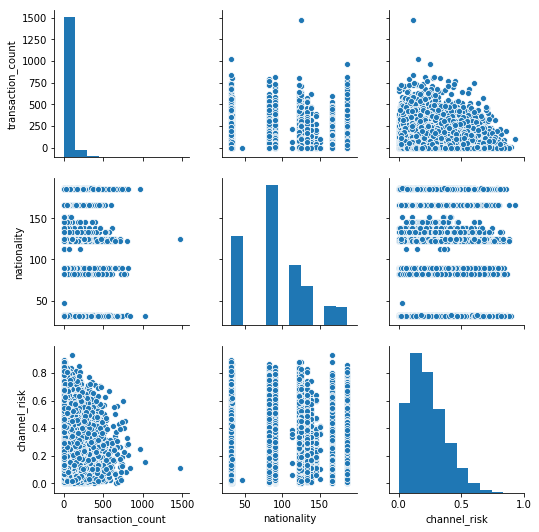

In [64]:
### Identifying outliers in the data by nationalities
sns.pairplot(data=CEO[['transaction_count','nationality','channel_risk']])

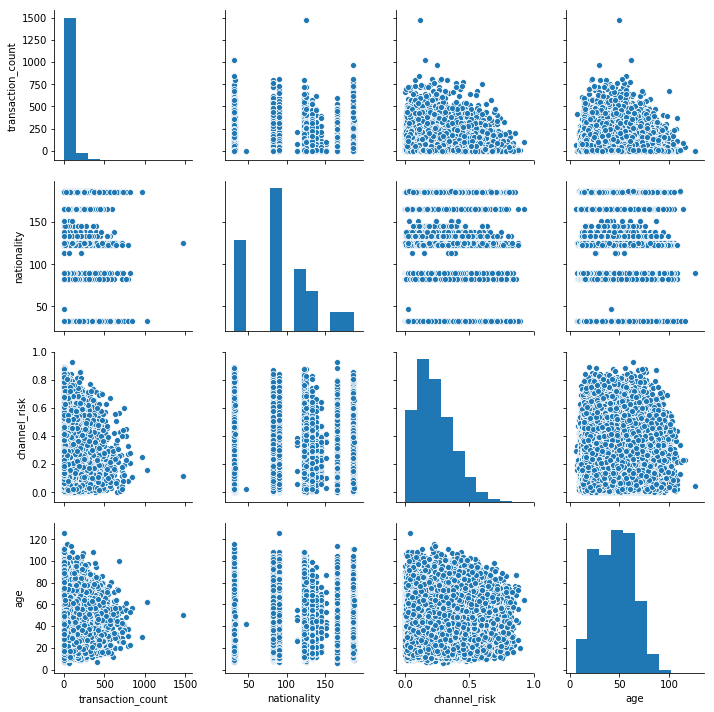

In [65]:
sns.pairplot(data=CEO[['transaction_count','nationality','channel_risk','age']])

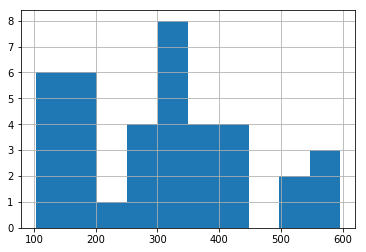

In [43]:
data[(data['is_pep'] == 0) & (data['io_ratio'] > 0.5) & (data.distinct_counterparties > 100)].transaction_count.hist()

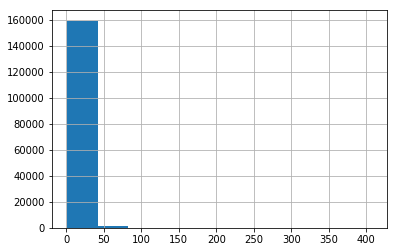

In [46]:
data[(data['is_pep'] == 0) & (data['io_ratio'] > 0.5) & (data.distinct_counterparties <=10)].transaction_count.hist()